# Project: Investigate If Patients Will Show Up for their Scheduled Appointment.
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, the major factor responsible for patients not showing up (NoShow) for their medical appointment will be analyzed. This dataset collects information from 110,526 patients in Brazil.<br>
The answer(s) to why patients refuse to show up for their medical appointment will help health administrators in reducing the number of hours medical experts and consultants spend in the hospital without attending to patients since they are paid on per hour.<br> 
The dataset provides dependent and independent variables. At least one dependent and three independent variable will be analyzed.Some of the independent variables to be analyzed include Age, Gender and SMS received, while showup will be the dependent variable to beam the searchlight on.<br>
It would be interesting to find out whether the SMS reminder is really benefiting the patients in showing up for appointments.


## Questions to ask before analyzing the dataset
(1) What proplem should be fix before commencing the analysis?<br>
  - Which of the datatype(s) needs adjustment?<br>
  - Which row(s) or columns(s) to dropped?<br>
  - Are there null cell(s) in the dataset?<br>
  - Are there outliers that will negatively affect my predictions?<br>
  
(2) Does Age, Gender and SMS Received affect not not showing up for appointment?<br>
(3) Does having a scholarship improve chances of keeping appointment?<br>
(4) Which of the variables influence probablity of showing up the most?<br>
(5) Which of the variables analyzed has the highest NoShow of appoinments?<br>
(6) Identity the limitation of this project?<br>

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties
#### What What proplem should be fix before commencing the analysis?

Import all the important libraries/packages for this project.

In [2]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
sb.set_style("darkgrid")
%matplotlib inline


In [3]:
# Load dataset and check the first five rows
df = pd.read_csv('Med_appointments2.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# View the last three rows of the dataset
df.tail(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


The dataset was downloaded and renamed 'Med_appointments2' so that I can keep the original file intact just incase anything goes wrong.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The first thing to know is that python store strings datatype as objects.<br>
There are interesting features in the datatype of some columns above;<br>
(1) ScheduledDay and AppointmentDay are stored as strings instead of datetime datatype.<br>
(2) Some Column names are mispelt e.g. Hipertension and Handcap.<br>
(3) From the dataset documentation the No-Show column has ('No' string for patinents that showed up for appointment and 'Yes' for patients that did not.<br> This has to be changed.<br>
(4) The information above shows that there are no null column(s) in this dataset.

In [6]:
# to show that the object datatype is actually a string datatype
type (df['Gender'][2])

str

In [7]:
# show the datatype of the column AppointmentDay. This has to be changed to datetime datatype
type (df['AppointmentDay'][4])

str

In [7]:
# display the counts of data in the dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The code above reveals;<br>
Handicap column has 5 instead of 2 (because a patient is either handicap or not).There is no data showing the categories being handicaps.<br>
There is presence of repeated ScheduleDay, this is possible as patients might be required to re-visit the doctor.

In [8]:
# checking the handicap values 
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [9]:
# Display the statistical summary of columns with integers 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The information above reveals the statistical data of each column that has integer datatype.<br>
It shows the maximum value of 4 in the handicap column, which should be 2.<br>
It reveals that is is a negative age(-1 is the minimum age).<br>

In [11]:
# To display the row with the negative age.
df.query('Age<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


The row with the negative age is being displayed above, while the number of rows with negative age is shown below

In [12]:
# display the count of age with -1 value
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

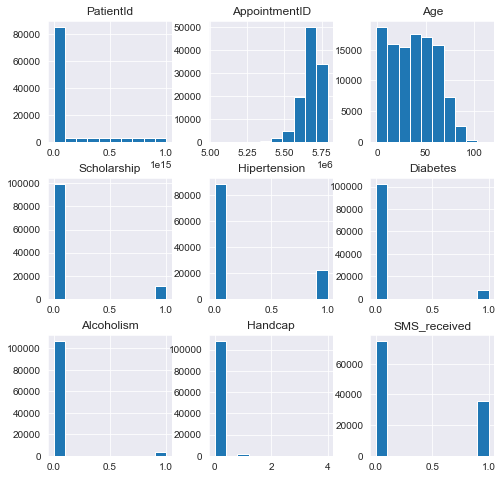

In [13]:
df.hist(figsize=(8,8));

The histogram chart above shows that;<br>
There are lots of children and a few very old people.<br>
There are few patients with scholarship. The number of patients having hypertension is above 20,000.<br> 
The number of patients that received SMS notification for their appointment are about half the number of people that did not receive SMS.

In [15]:
#Check for any duplicate row in the dataset
df.duplicated().value_counts()

False    110527
dtype: int64

The next stage is data cleaning. These arethe columns that requires cleaning work;<br>
(1) Change the 'No-show' column to 'ShowUp', set the values to 0 for patients that did not show up for appointments and 1 for patients that showed up.<br>
(2) The Datatype of the 'AppointmentDay' and 'ScheduleDay' be changed to datetime datatype.<br>
(3) Handicap and Hypertension Column name be well spelt, and the value of handicap changed to '0' and '1'.<br>
(4) One row contains negative age value, the row will be droped.

### Cleaning the No-Show Column

In [8]:
# Renaming the No-show column to ShowUp, and correcting Hipertension and Handcap columns
df.rename(columns = {'No-show':'ShowUp','Handcap':'Handicap','Hipertension':'Hypertension'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ShowUp
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# change value in showup column to 0 for noshow and 1 for showup 
df['ShowUp'] = df['ShowUp'].apply(lambda x: 1 if x=='No' else 0 )

In [10]:
#Selecting multiple ranges of column from columns values that has 1 and 0 as data, as a new dataframe

# create the new dataframe
df_new = df.iloc[:, np.r_[:3, 7:14]]

# view the first few rows to confirm this was successful
df_new.head(10)

,PatientId,AppointmentID,Gender,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ShowUp
0,2.987250e+13,5642903,F,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,0,1,1,0,0,0,1
5,9.598513e+13,5626772,F,0,1,0,0,0,0,1
6,7.336882e+14,5630279,F,0,0,0,0,0,0,0
7,3.449833e+12,5630575,F,0,0,0,0,0,0,0
8,5.639473e+13,5638447,F,0,0,0,0,0,0,1
9,7.812456e+13,5629123,F,0,0,0,0,0,0,1


The Column ShowUp has been corrected to '0' for NoShow (Patients that did not show up for appointments), and '1' for ShowUp (Patients that ShowUp for appointments)

In [11]:
#display the number of ShowUp=1 and Noshow =0
df['ShowUp'].value_counts()

1    88208
0    22319
Name: ShowUp, dtype: int64

### Reducing values in Handicap column

In [21]:
# checking the handicap values after using the inplace 
df.Handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [22]:
# replacing the values 2,3 and 4 in  the handicap column with 1.

df['Handicap'].replace(2 ,1 ,inplace=True)
df['Handicap'].replace(3 ,1 ,inplace=True)
df['Handicap'].replace(4 ,1 ,inplace=True)

Replacing the values 2,3 and 4 with 1 is most approriate since its either the patient is handicap or not.

In [23]:
# checking the correction on handicap column
df.Handicap.value_counts()

0    108286
1      2241
Name: Handicap, dtype: int64

In [26]:
# Checking the handicap column with a dataframe named df_2
df_2 = df.iloc[:, np.r_[:3, 7:14]]
df_2.tail(5)

,PatientId,AppointmentID,Gender,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ShowUp
110522,2.572134e+12,5651768,F,0,0,0,0,0,1,1
110523,3.596266e+12,5650093,F,0,0,0,0,0,1,1
110524,1.557663e+13,5630692,F,0,0,0,0,0,1,1
110525,9.213493e+13,5630323,F,0,0,0,0,0,1,1
110526,3.775115e+14,5629448,F,0,0,0,0,0,1,1


### Converting Strings to Datetime Datatype

In [27]:
# Convert ScheduledDay and AppointmentDay to datetime type

df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)


In [28]:
# check the dadtatype of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  ShowUp        

The ScheduleDay and AppointmentDay datatypes has been changed to datetime, also ShowUp column is now integer datatype.

### Droping the negative age

In [29]:
# selection row(s) which have negative Age with a query 

df_negative_age = df.query("Age<0")
df_negative_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ShowUp
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [35]:
# droping the negative age row
df = df.drop (index=99832)

In [36]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ShowUp
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.798066
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The above table shows that the minimum age is now 0 (which shows the presence of babies below 1 year old), handicap has maximum of 1.

<a id='eda'></a>
## Exploratory Data Analysis
The independent variables in this dataset are Age,Handicap, Hypertension and Scholarship, because they are considered as input.<br> The dependent variable here eis the ShowUp column, this column is more of an output and it is therefore regarded as variable.


### The First Major Question is, How Many Patients did Not Show up for their Appointment?

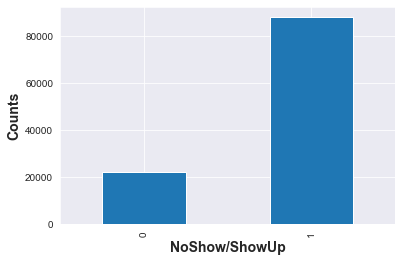

In [19]:
# compare showup with noshow (Noshow=0,ShowUp = 1 )
df.groupby('ShowUp').count().iloc[:, 0].plot(kind='bar');
df['ShowUp'].value_counts()
plt.xlabel("NoShow/ShowUp", fontsize = 14, fontweight = 'bold')
plt.ylabel("Counts", fontsize = 14, fontweight = 'bold');

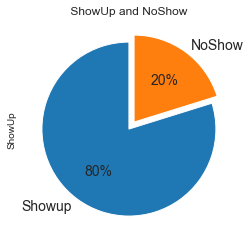

In [16]:
# Pie Chart to display patients that showup and did not showup for appoinments
labels = ['Showup','NoShow']

df['ShowUp'].value_counts().plot(kind='pie', title=' ShowUp and NoShow ', startangle = 90,textprops={'fontsize': 14},
                                      labels=labels, autopct = '%0.0f%%', explode=[0, 0.1]);

The answer to the first question is, 20% of the total patients did not showup (NoShow) for their appointment. This 20% is 22,319 in number.<br>
This number constitute about a quarter of those that showed up (ShowUp) for their appointment.

### How Does Age Affect the Probability of Showing Up?

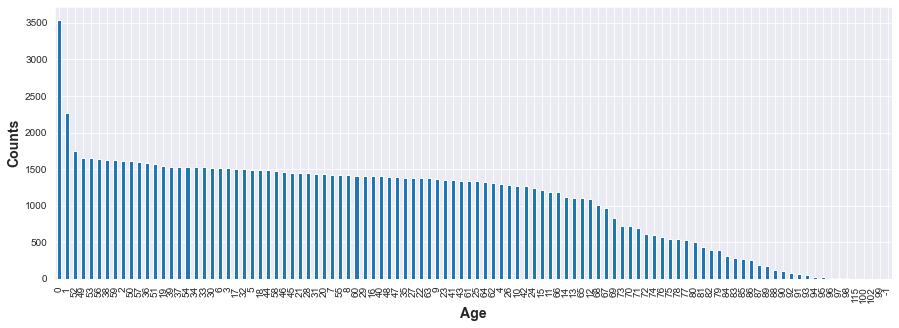

In [17]:
# This barchart will display a very fine age distribution of the patients
df['Age'].value_counts().plot(kind = 'bar', figsize=(15,5));
plt.xlabel("Age", fontsize = 14, fontweight = 'bold')
plt.ylabel("Counts", fontsize = 14, fontweight = 'bold');

The above chart clearly shows that infants (less than a year old) are more than 3500.<br> This bar chart is very fine and may not show the kind of distribution that is needed for this analysis.<br> A more coarse distribution shall be examined below.

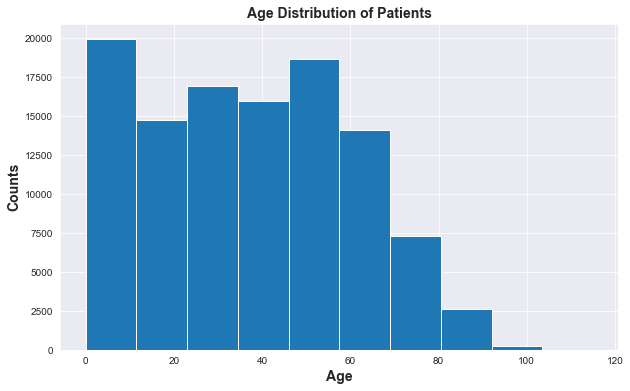

In [41]:
# View the age distribution of the patients
df['Age'].hist(figsize=(10,6));
plt.title('Age Distribution of Patients', fontsize = 14, fontweight = 'bold');
plt.xlabel("Age", fontsize = 14, fontweight = 'bold')
plt.ylabel("Counts", fontsize = 14, fontweight = 'bold');

The barchart above is a coarse age distribution which reveals that patients within the age group of about 45-57 years are more than 18000.<br> This is the second largest group compared to 0-5 years.

In [42]:
# show statistical age distribution 
df.describe().Age

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The statistical age distribution above must be adjusted for this analysis. The reasons are;<br>
Age 0-18 year is a wide distribution, its a collection of babies and teenagers which should be splited.<br>
Also there is another large age distribution which is  55-115 years, this has to be splitted.

In [66]:
# Age group distribution
points= [0,5, 20, 46, 70, 90, 115]
age_groups = df.groupby(pd.cut(df.Age, points))

In [26]:
# grouping the age of the patients
boundary= [0,5,20,46,70,90,115]

# assign category to age groups
labels = ['Toddler','Child','Youth','Adult','Old','VeryOld']

#apply the grouping
df['age_groups'] = pd.cut(df['Age'], bins = boundary, labels=labels)

df.age_groups.value_counts()

Youth      37197
Adult      32908
Child      20117
Old         8265
Toddler     8192
VeryOld      308
Name: age_groups, dtype: int64

In [24]:
# Display mean of the age group
df.groupby('age_groups', as_index=False)['ShowUp'].mean()

,age_groups,ShowUp
0,Toddler,0.811279
1,Child,0.755878
2,Youth,0.775009
3,Adult,0.832989
4,Old,0.843194
5,VeryOld,0.798701


In [33]:
#the population of each age group that showed up for their appointments,groupby showup, 1 is ShowUp, 0 is NoShow.

df.groupby(['age_groups','ShowUp'])['SMS_received'].count()

age_groups  ShowUp
Toddler     0          1546
            1          6646
Child       0          4911
            1         15206
Youth       0          8369
            1         28828
Adult       0          5496
            1         27412
Old         0          1296
            1          6969
VeryOld     0            62
            1           246
Name: SMS_received, dtype: int64

In [70]:
#Check if the column age_group has been created
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ShowUp,age_groups
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Adult
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,Adult
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Adult


Age group column successfully created.

In [74]:
#Group by Age_group, filtered by Gender, 

df.groupby(['age_groups', 'Gender'])['ShowUp'].count()

age_groups  Gender
Toddler     F          3883
            M          4309
Child       F         11537
            M          8580
Youth       F         26559
            M         10638
Adult       F         22385
            M         10523
Old         F          5534
            M          2731
VeryOld     F           220
            M            88
Name: ShowUp, dtype: int64

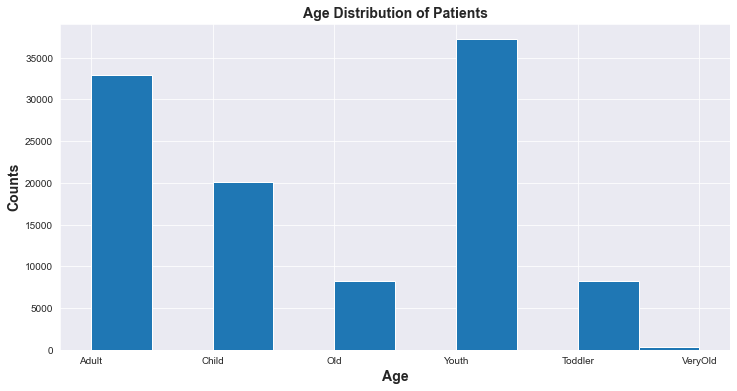

In [28]:
# View the age_group distribution of the patients in a chart
df['age_groups'].hist(figsize=(12,6));
plt.title('Age Distribution of Patients', fontsize = 14, fontweight = 'bold');
plt.xlabel("Age", fontsize = 14, fontweight = 'bold')
plt.ylabel("Counts", fontsize = 14, fontweight = 'bold');

The youth has the highest population of patients. This age group is between 20-46 years of age.

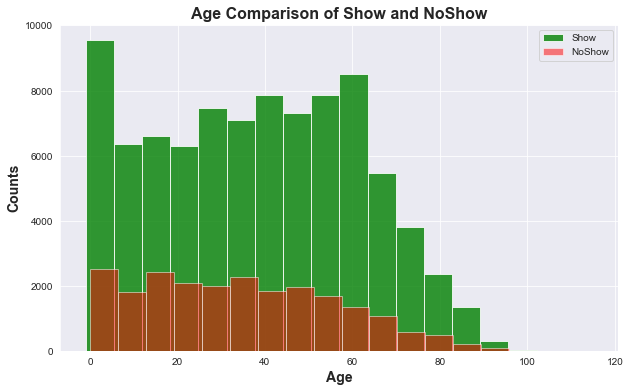

In [34]:
# Histogram of the age distribution of patients that showup and "NoShow" 
Show = df['ShowUp']==1
NoShow = df['ShowUp']==0

fig, ax = plt.subplots(1, figsize = (10,6))                  # creating the plot and the size

df.Age[Show].hist(alpha=0.8, bins=18, label='Show', color='green')  #assign label and alpha and bins and title to each histogram
df.Age[NoShow].hist(alpha=0.5, bins=18, label='NoShow', color='red')
plt.title('Age Comparison of Show and NoShow', fontsize = 16, fontweight ='bold');
plt.xlabel("Age", fontsize = 14, fontweight = 'bold')
plt.ylabel("Counts", fontsize = 14, fontweight = 'bold');
plt.legend();

The bar chart above reveals that the number of patients with NoShow for their appointment reduces with age. Old people do not always want to miss their medical appointments.<br>
Although the proportion would have given a better view.

### Brief analysis for Very Old Patients 100 years and above

In [56]:
# Check on data of very old people above 100
df_Very_Old = df.query("Age>99")

df_Very_Old

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ShowUp
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,1
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1
79270,9.739430e+12,5747809,M,2016-05-30 16:21:56+00:00,2016-05-31 00:00:00+00:00,100,TABUAZEIRO,0,0,0,0,1,0,1
79272,9.739430e+12,5747808,M,2016-05-30 16:21:56+00:00,2016-05-31 00:00:00+00:00,100,TABUAZEIRO,0,0,0,0,1,0,1
90372,2.342836e+11,5751563,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,1
92084,5.578313e+13,5670914,F,2016-05-06 14:55:36+00:00,2016-06-03 00:00:00+00:00,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,1
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,1


In [65]:
# Very Old patients Statistics
df_Very_Old.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,ShowUp
count,1.100000e+01,1.100000e+01,11.000000,11.0,11.000000,11.0,11.0,11.000000,11.000000,11.000000
mean,1.752975e+14,5.701442e+06,107.181818,0.0,0.090909,0.0,0.0,0.545455,0.181818,0.727273
std,3.438566e+14,5.647342e+04,7.520880,0.0,0.301511,0.0,0.0,0.522233,0.404520,0.467099
min,2.342836e+11,5.562812e+06,100.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,9.739430e+12,5.685596e+06,100.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.500000
50%,3.196321e+13,5.717451e+06,102.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,1.000000
75%,4.387317e+13,5.745922e+06,115.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,1.000000
max,9.762948e+14,5.751563e+06,115.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000


The table above revealed the following about patients from 100years above old.<br>
There are 11 of them, 9 of them are females 2 of them are males.<br>
8 of them showed up for their appointments, 2 of them male while 6 are females.<br>
The oldest is 115 years.<br>
None of them have scholarship.

### Is Gender a Factor Responsible for NoShow?

In [80]:
Gender_count = df['Gender'].value_counts()
Gender_count 

F    71839
M    38687
Name: Gender, dtype: int64

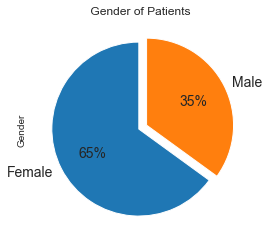

In [125]:
labels = ['Female', 'Male']

Gender_count.plot(kind='pie', title=' Gender of Patients', startangle = 90, textprops={'fontsize': 14},
                                      labels=labels, autopct = '%0.0f%%', explode=[0, 0.1]);

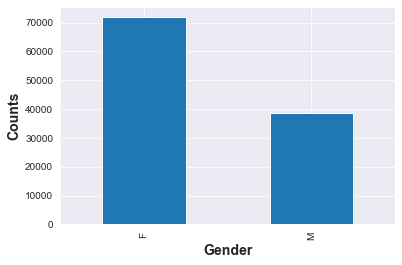

In [35]:
#check the count of male and female patients
df.groupby('Gender').count().iloc[:, 0].plot(kind='bar');
df['Gender'].value_counts()
plt.xlabel("Gender", fontsize = 14, fontweight = 'bold')
plt.ylabel("Counts", fontsize = 14, fontweight = 'bold');

From the barchart above 65% of the patients are females, while 35% are males.

In [86]:
#The number of patients that showed up for their appointment with respect to gender
df.groupby('Gender').ShowUp.value_counts()

Gender  ShowUp
F       1         57245
        0         14594
M       1         30962
        0          7725
Name: ShowUp, dtype: int64

The table above shows that 19.9% of the male did not showup for their appointments, while 20.3% of the female patients did not showup for their appointments.

In [88]:
# To get the number of female that showed up
Female_show=df.query('Gender=="F"')['ShowUp'].value_counts()
Female_show

1    57245
0    14594
Name: ShowUp, dtype: int64

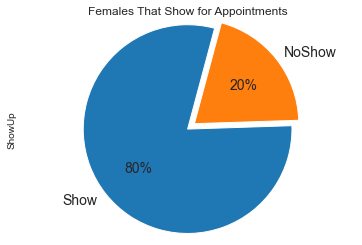

In [126]:
labels = ['Show', 'NoShow']
plt.axis('equal')
Female_show.plot(kind='pie', title='Females That Show for Appointments', radius = 1.2, startangle = 75,
                 textprops={'fontsize': 14}, labels=labels, autopct = '%0.0f%%', explode=[0, 0.1]);

In [90]:
# To get the number of male that showed up
Male_show=df.query('Gender=="M"')['ShowUp'].value_counts()
Male_show

1    30962
0     7725
Name: ShowUp, dtype: int64

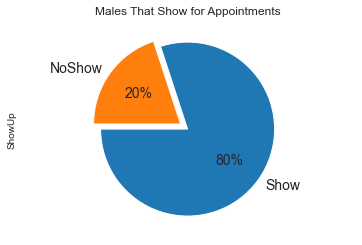

In [127]:
labels = ['Show', 'NoShow']
plt.axis('equal')
Male_show.plot(kind='pie', title='Males That Show for Appointments', radius = 1.0, startangle = 180, 
                                  textprops={'fontsize': 14}, labels=labels, autopct = '%0.0f%%', explode=[0, 0.1]);

The pie chart coroborate the barchart,Noshow indicates patients that did not showup for appointment, while show reveals patients that made it for their appointment.

In [131]:
# Display the mean of the Age group, filtered by Gender

df.groupby(['age_groups', 'Gender'], as_index=False)['Age'].mean()

,age_groups,Gender,Age
0,Toddler,F,2.741952
1,Toddler,M,2.794616
2,Child,F,13.860796
3,Child,M,12.008625
4,Youth,F,33.415490
5,Youth,M,34.203046
6,Adult,F,57.348090
7,Adult,M,57.527511
8,Old,F,78.023310
9,Old,M,77.876236


In [101]:
# Group by Age_group, filtered by Gender

df.groupby(['age_groups', 'Gender'], as_index=False)['Age'].count()

,age_groups,Gender,Age
0,Toddler,F,3883
1,Toddler,M,4309
2,Child,F,11537
3,Child,M,8580
4,Youth,F,26559
5,Youth,M,10638
6,Adult,F,22385
7,Adult,M,10523
8,Old,F,5534
9,Old,M,2731


The table above shows that apart from the Toddler, other age groups has more female patients.

### Do Patients Receive SMS as Reminder for Appointments?

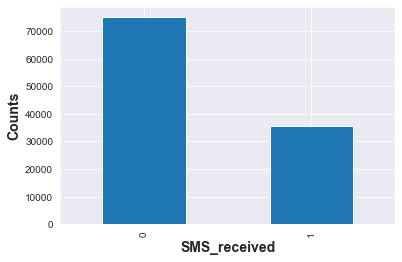

In [36]:
# compare showup with noshow
df.groupby('SMS_received').count().iloc[:, 0].plot(kind='bar');
df['SMS_received'].value_counts()
plt.xlabel("SMS_received", fontsize = 14, fontweight = 'bold')
plt.ylabel("Counts", fontsize = 14, fontweight = 'bold');

This barchart shows that 75,044 patients (68% of the total patients) did not receive SMS as a reminder for their appointment.

In [109]:
# Group by SMS_received, filtered by Gender

df.groupby(['SMS_received', 'Gender'])['Age'].count()

SMS_received  Gender
0             F         47637
              M         27407
1             F         24202
              M         11280
Name: Age, dtype: int64

The table above indicate that the number of patients that did receive SMS doubles the ones that received, for both male and female patients.


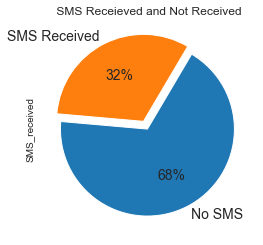

In [129]:
labels = ['No SMS', 'SMS Received']

df['SMS_received'].value_counts().plot(kind='pie', title=' SMS Receieved and Not Received', startangle = 175, 
                                      textprops={'fontsize': 14},labels=labels, autopct = '%0.0f%%', explode=[0, 0.1]);

From the pie chart above 68% of the total patients did not receive SMS. If 80% of the patients showed up for their appointment this shows that SMS notification did not have a significant effect of the probability of a patient showing up for appointment or not.

<a id='conclusions'></a>
## Conclusions

The analysis carried out on the data of over 100,000 patients in Brazil aims to identify the most significant factor influencing a No-show (patients not keeping to their appointment) by the patients. From the given list of parameters, such as Gender, Scheduled and Appointment Date, Age, Neighbourhood, sms_alert and certain conditions of a given patient, the analysis predicted, whether the given appointment is likely to be a “No-Show”. In this analysis, four variables were worked on, these are; gender, age and SMS_received, these are the dependent variables. The only dependent variable analyzed is the “No-Show” column.

### Gender
Over 22,000 patients did not show up for their appointment, this constitutes about 20% of the all the patient’s data acquired for analysis. About 20% of both male and female did not showup for their appointment. This reveals that gender is not a factor that affects patients appointments.

### SMS Received
From the analysis carried out, the result on SMS received showed that although SMS might be a good reminder system, it may not be optimal in helping patients to keep their appointments. A large number of the patients did not receive SMS, this shows that there are other effective reminder system that made the patients that did not receive SMS keep their appointment.

### Age
This is a major factor that affect patients showing up as reveal by the ananlysis. A large proportion of patients within the age group categorized as infants, old and very old keep up with their appointments.

### Limitations
One of the limitation to the analysis is incomplete dataset. Information about the distance eac patient will 
have to travel to the hospital could be a huge factor affecting them showing up. Also the time of the day for
the appointment is not given. The time of the day for the appointment might be an important factor to predict if a patient will show up.